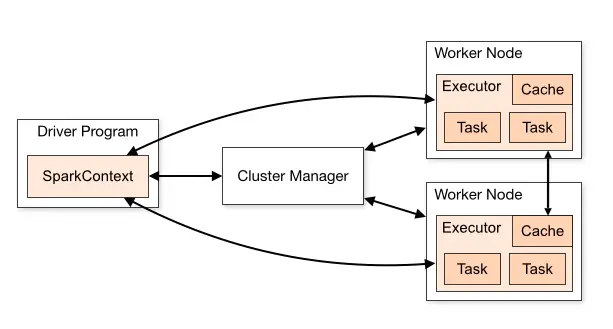

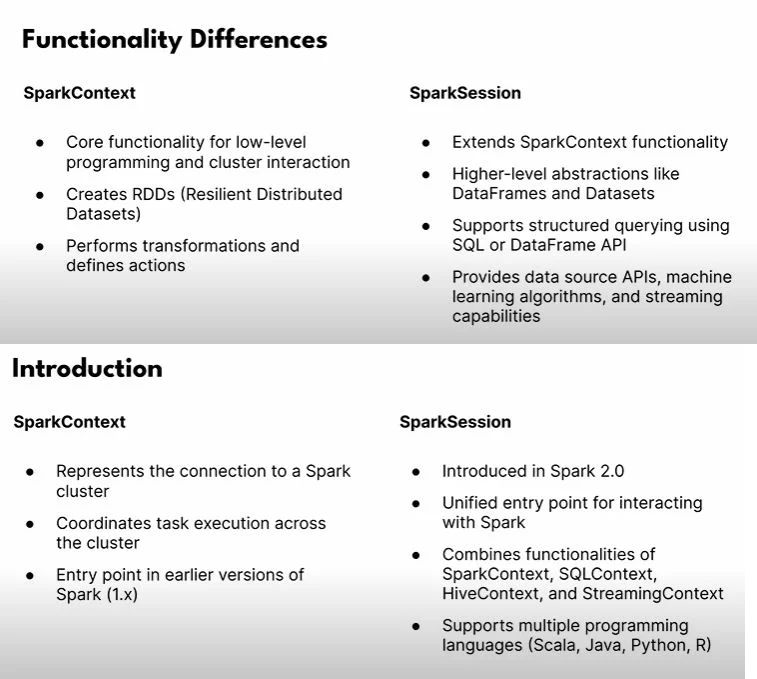

In [59]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

### Creating a SparkContext 

In [60]:
spark = SparkSession.builder.appName('Create_RDD').getOrCreate()

In [61]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Create_RDD>

In [16]:
# In order to see all system configurations
sc.getConf().getAll()

### There are three ways to create an RDD in Spark.
1) Parallelizing already existing collection in driver program.
2) Referencing a dataset in an external storage system (e.g. HDFS, Hbase, shared file system).
3) Creating RDD from already existing RDDs.

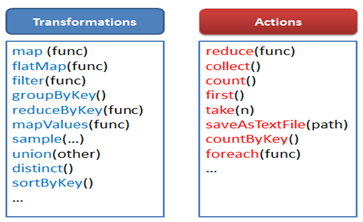

### Creating RDD and performing some Actions

In [44]:
names = sc.parallelize(['Adam','Cray','Shuan','Brain','Mark','Christ','Adam','Satya','Mark','Mark'])
type(names)

pyspark.rdd.RDD

In [45]:
# Performing action on RDD
a = names.collect()
type(a)

list

#### In PySpark, creating an RDD with the parallelize method results in a distributed collection of data partitioned across multiple cluster nodes (or your local machine). This RDD enables parallel data processing. When you use the collect() action on an RDD, it gathers data from distributed partitions and stores it in a local data structure, typically a Python list, on the driver program.

In [46]:
names_count = names.countByValue()

In [47]:
for name, count in names_count.items():
    print(f"{name}: {count}")

Adam: 2
Cray: 1
Shuan: 1
Brain: 1
Mark: 3
Christ: 1
Satya: 1


In [48]:
names.take(5)

['Adam', 'Cray', 'Shuan', 'Brain', 'Mark']

In [ ]:
# RDD using textfile
# sc.textFile("path.txt")

### Creating Partitions in RDD 

In [62]:
num = sc.parallelize([5,5,3,9,6,1,8],3)

In [63]:
num.countByValue()

defaultdict(int, {5: 2, 3: 1, 9: 1, 6: 1, 1: 1, 8: 1})

In [64]:
num.glom().collect()

[[5, 5], [3, 9], [6, 1, 8]]

In [65]:
type(num.glom())

pyspark.rdd.PipelinedRDD

In [58]:
num.min() , num.max() , num.mean()

(1, 9, 5.285714285714286)

In [66]:
# 5+5+3+9+6+1+8
num.reduce(lambda a,b: a+b)

37

In [67]:
# 5*5*3*9*6*1*8
num.reduce(lambda a,b: a*b)

32400

In [68]:
num.reduce(lambda a,b: a if a>b else b)

9

In [69]:
def myfun(a,b):
    return a*2 + b*2

In [70]:
num.reduce(myfun)

264

In [71]:
num.takeOrdered(3)

[1, 3, 5]